## 线性回归的从零开始实现

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.4937, -1.1500]) 
label: tensor([5.1230])


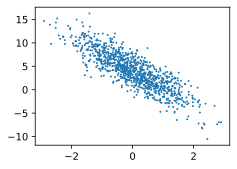

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)]
        )
        yield features[batch_indices],labels[batch_indices]

In [8]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break


tensor([[-0.4396, -1.0942],
        [-1.2357, -1.3858],
        [ 1.9883, -0.5294],
        [ 0.5601,  1.1124],
        [ 1.4641,  1.3816],
        [ 0.1082, -0.7825],
        [-0.3014, -2.2849],
        [ 1.0604,  0.4950],
        [-0.0109,  1.4913],
        [-0.1366,  0.4498]]) 
 tensor([[ 7.0388],
        [ 6.4330],
        [ 9.9814],
        [ 1.5505],
        [ 2.4435],
        [ 7.0913],
        [11.3771],
        [ 4.6360],
        [-0.8789],
        [ 2.3956]])


In [9]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b= torch.zeros(1,requires_grad=True)

In [10]:
def linreg(X,w,b):  #@save
    """线性回归模型。"""
    return torch.matmul(X,w)+b


In [11]:
def squared_loss(y_hat,y):  #@save
    """均方损失。"""
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [12]:
def sgd(params,lr,batch_size):  #@save
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        tain_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss {float(tain_l.mean()):f}')

epoch 1, loss 0.048018
epoch 2, loss 0.000198
epoch 3, loss 0.000051


In [15]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0005, -0.0012], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0008], grad_fn=<RsubBackward1>)
